In [2]:
#!/usr/bin/env python
# coding: utf-8
# In[26]:


import os, json, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
summary=[]
labeles=[]

HOME_DIR = os.getcwd()
Bugs_DIR = os.path.join(HOME_DIR,"bugs")


json_files = [pos_json for pos_json in os.listdir(Bugs_DIR) if pos_json.endswith('.json')]

json_data = []
for count,value in enumerate(json_files):
	with open(os.path.join(Bugs_DIR,value), 'r',encoding='cp850') as datafile:
		temp_data = json.load(datafile)
		print(f"File:{value} <> Reports: {len(temp_data['bugs'])}")
		json_data.extend(temp_data["bugs"])

print(f"Total Reports: {len(json_data)}")
df = pd.DataFrame(json_data)
print(f"Reports in DataFrame: {len(df)}")
pro= pd.read_csv("C:/Users/Ali/Desktop/processed.csv")
#print(bugs_dataFrame.head)
df.drop(['severity','summary','id','product','status','description'],axis=1,inplace=True)
df.info
summary = pro.summary
labels = df.resolution
print(f"length of summary:{len(summary)}")
print(f"length of labels:{len(labels)}")


File:bugzilla.json <> Reports: 5324
File:Calendar.json <> Reports: 1785
File:Camino Graveyard.json <> Reports: 1290
File:Core Graveyard.json <> Reports: 888
File:Core.json <> Reports: 7228
File:Firefox.json <> Reports: 7368
File:MailNews Core.json <> Reports: 2796
File:SeaMonkey.json <> Reports: 8716
File:Thunderbird.json <> Reports: 5129
File:Toolkit.json <> Reports: 1899
Total Reports: 42423
Reports in DataFrame: 42423
length of summary:42423
length of labels:42423


Text(0.5, 1.0, 'Enhancement Reports')

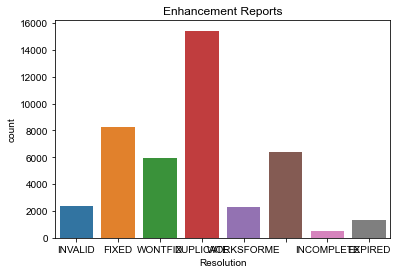

In [8]:
sns.countplot(df.resolution)
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Resolution')
plt.title('Enhancement Reports')
#INVALID|FIXED|WONTFIX|DUPLICATE|WORKSFORME|EMPTY|INCOMPLETE|EXPIERD

Lables: 42423
summary: 42423


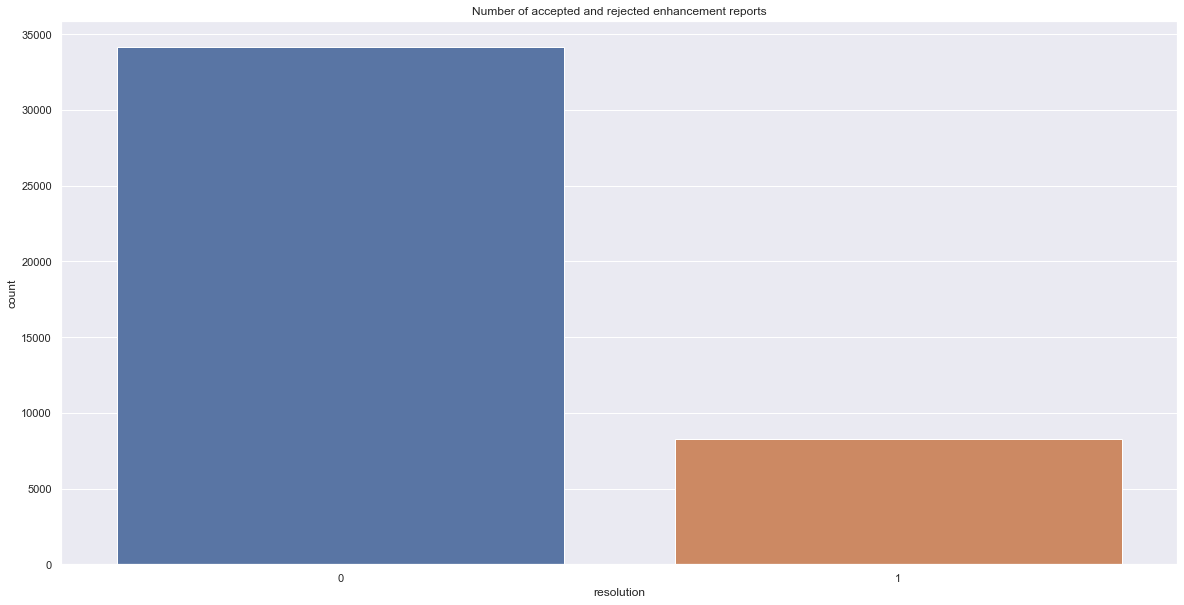

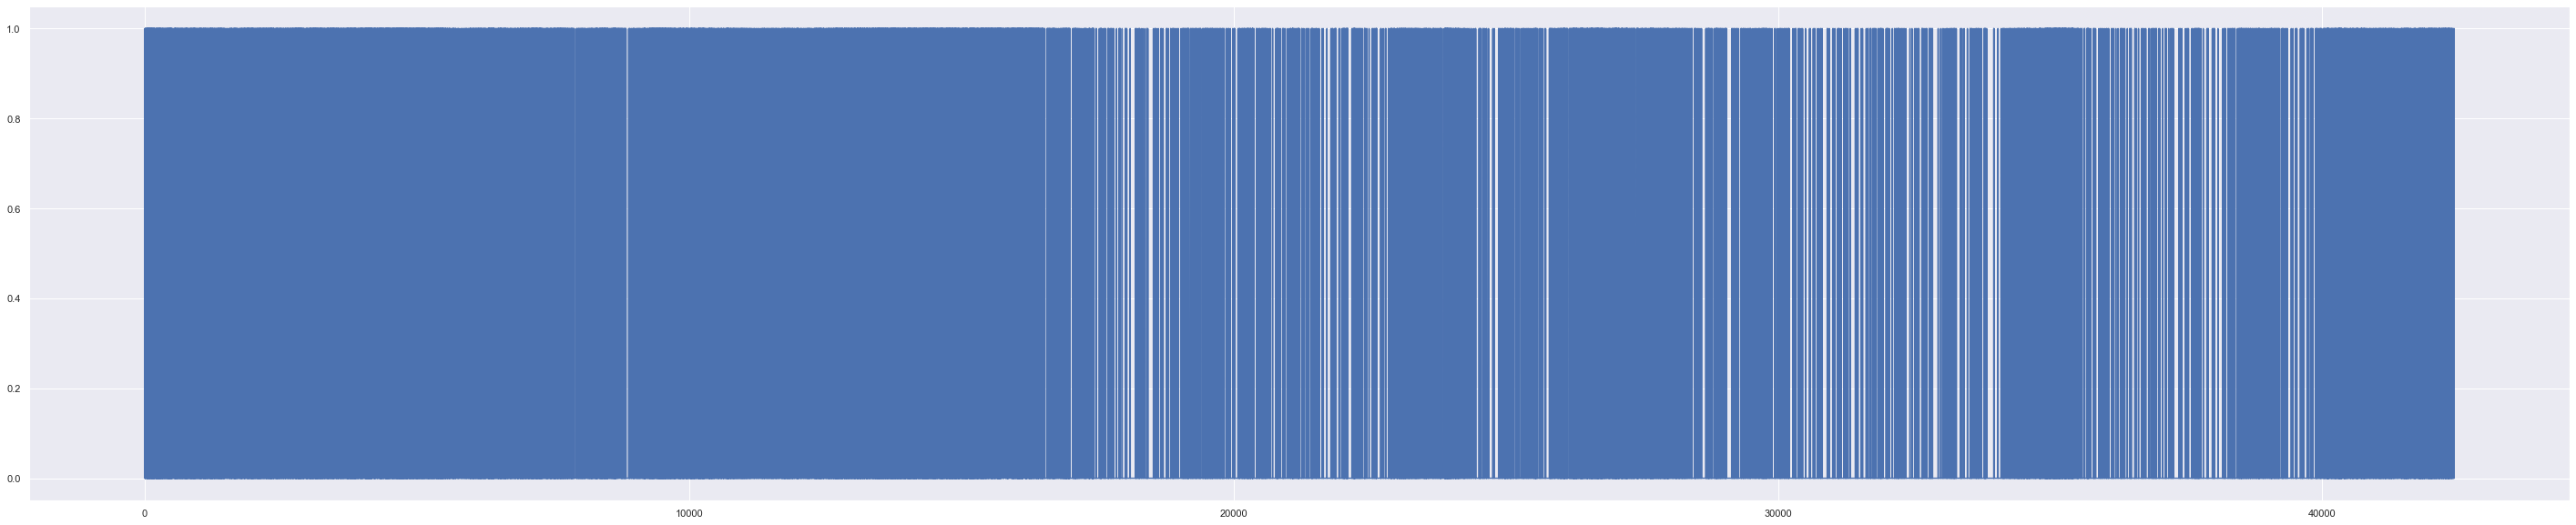

In [21]:
label=[]
for x in range(len(labels)):
  #print(labels[x])
  if labels[x]=="FIXED":
    labels[x]=1
  elif labels[x]=="WONTFIX":
   labels[x]=0
  elif labels[x]=="INVALID":
    labels[x]=0
  elif labels[x]=="INCOMPLETE":
    labels[x]=0
  elif labels[x]=="WONTFIX":
    labels[x]=0
  elif labels[x]=="WORKSFORME":
    labels[x]=0
  elif labels[x]=="EXPIRED":
    labels[x]=0
  elif labels[x]=="DUPLICATE":
    labels[x]=0
  elif labels[x]=="":
    labels[x]=0
  label.append(labels[x])
print("Lables:",len(label))
print("summary:",len(summary))
#print(summary)
#print(label)
sns.countplot(label)
plt.xlabel('resolution')
plt.title('Number of accepted and rejected enhancement reports')

plt.figure(figsize=(50,10))
plt.plot(label)

In [ ]:
train_summary,test_summary,train_resolution,test_resolution = train_test_split(summary,label,test_size=0.17)
print("Training summary:",len(train_summary))
print("Testing_summary:",len(test_summary))
print("Training_lables",len(train_resolution))
print("Testing_labels:",len(test_resolution))

In [23]:
max_words = 2000
max_len = 150
tok = Tokenizer(num_words=max_words)

#tok.fit_on_texts(train_summary)
#train_summary = tok.texts_to_sequences(train_summary)
#train_summary = sequence.pad_sequences(train_summary,maxlen=max_len)
#print(train_summary)




TypeError: 'Tokenizer' object is not iterable

In [19]:
train_summary=np.array(train_summary)
train_resolution=np.array(train_resolution)


In [14]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [15]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [16]:
#CNN

In [17]:
model.fit(train_summary,train_resolution,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Epoch 1/10
221/221 [==============================] - 78s 354ms/step - loss: 0.4917 - accuracy: 0.8040 - val_loss: 0.4754 - val_accuracy: 0.8100
Epoch 2/10
221/221 [==============================] - 70s 318ms/step - loss: 0.4660 - accuracy: 0.8069 - val_loss: 0.4864 - val_accuracy: 0.8082


In [17]:
test_summary = tok.texts_to_sequences(test_summary)
test_summary = sequence.pad_sequences(test_summary,maxlen=max_len)

#print(test_summary)
#print(test_resolution)

In [18]:
test_summary=np.array(test_summary)
test_resolution=np.array(test_resolution)
accr = model.evaluate(test_summary,test_resolution)

226/226 [==============================] - 10s 43ms/step - loss: 0.4657 - accuracy: 0.8351


In [19]:
predicted_resoultion = model.predict(test_summary)
#print(predicted_resoultion)
predicted_resoultion = np.argmax(predicted_resoultion, axis = -1)
#print(predicted_resoultion)
print(len(predicted_resolution))
print(len(test_resolution))

accuracy = accuracy_score(test_resolution, predicted_resoultion)
print('Accuracy: %f' % accuracy)

#f1_score = f1_score(test_resolution, predicted_resoultion, average='macro')
#print('f1_score: %.3f' % f1_score)
recall = recall_score(test_resolution, predicted_resoultion, average='macro',zero_division='warn')
print('Recall: %.3f' % recall)
kappa = cohen_kappa_score(test_resolution, predicted_resoultion)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_resolution, predicted_resoultion)
print('ROC AUC: %f' % auc)
precision = precision_score(test_resolution, predicted_resoultion,zero_division='warn')
print('Precision: %f' % precision)
# confusion matrix
matrix = confusion_matrix(test_resolution, predicted_resoultion)
print(matrix)

NameError: name 'predicted_resolution' is not defined